In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import decimal
import math
import os, sys

Średnia prędkość dla rurki_01.txt :  0.88  i średnie ciśnienie:  0.47


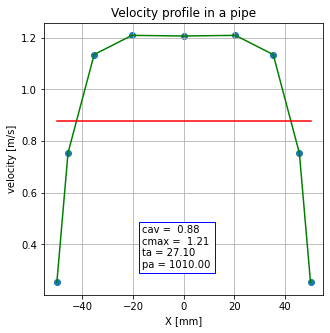

Średnia prędkość dla rurki_02.txt :  1.8  i średnie ciśnienie:  1.96


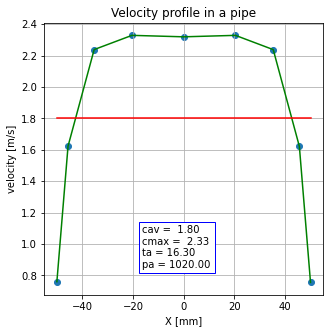

Średnia prędkość dla rurki_03.txt :  2.74  i średnie ciśnienie:  4.55


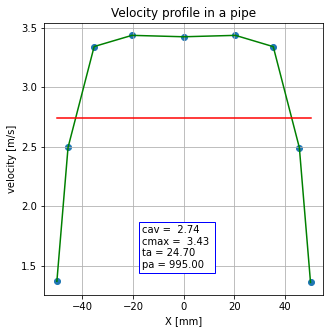

Średnia prędkość dla rurki_04.txt :  3.69  i średnie ciśnienie:  8.24


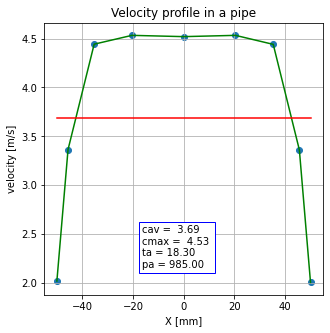

Średnia prędkość dla rurki_05.txt :  4.64  i średnie ciśnienie:  13.04


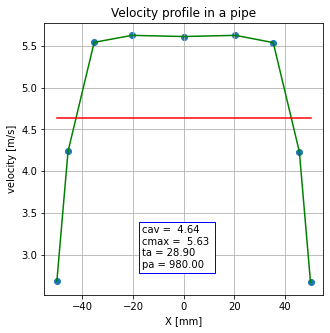

Średnia prędkość dla rurki_06.txt :  5.59  i średnie ciśnienie:  18.93


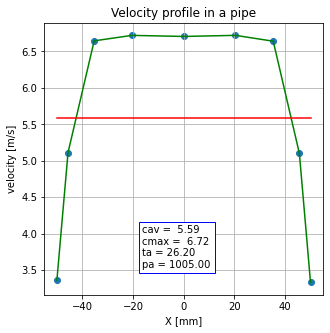

Średnia prędkość dla rurki_07.txt :  6.55  i średnie ciśnienie:  25.95


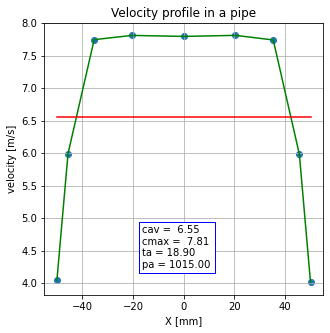

Średnia prędkość dla rurki_08.txt :  7.51  i średnie ciśnienie:  34.08


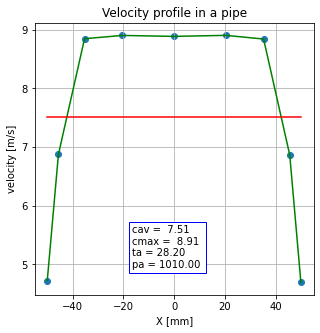

Średnia prędkość dla rurki_09.txt :  8.46  i średnie ciśnienie:  43.31


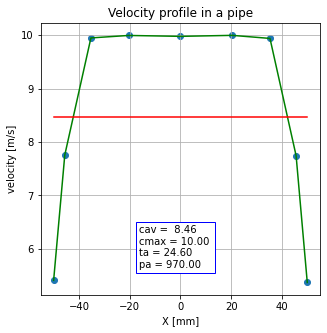

Średnia prędkość dla rurki_10.txt :  9.42  i średnie ciśnienie:  53.63


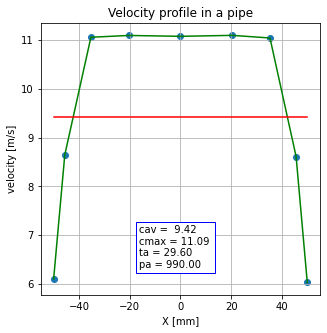

Średnia prędkość dla rurki_11.txt :  10.37  i średnie ciśnienie:  65.03


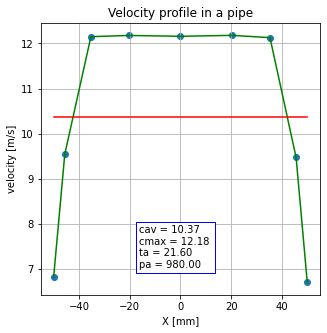

Średnia prędkość dla rurki_12.txt :  11.32  i średnie ciśnienie:  77.51


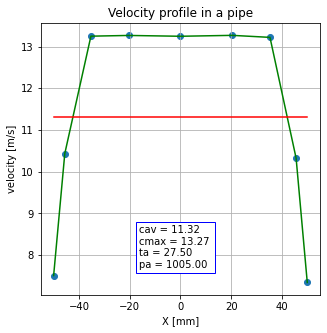

Średnia prędkość dla rurki_13.txt :  12.27  i średnie ciśnienie:  91.11


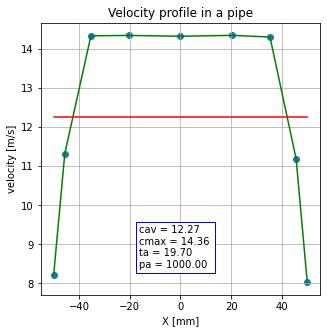

Średnia prędkość dla rurki_14.txt :  13.23  i średnie ciśnienie:  105.83


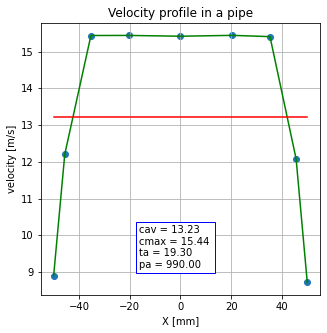

Średnia prędkość dla rurki_15.txt :  14.18  i średnie ciśnienie:  121.61


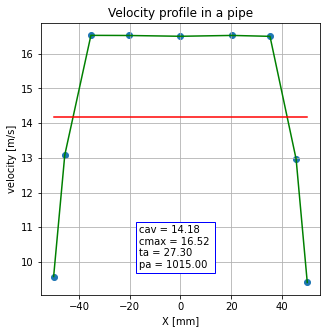

Średnia prędkość dla rurki_16.txt :  15.13  i średnie ciśnienie:  138.44


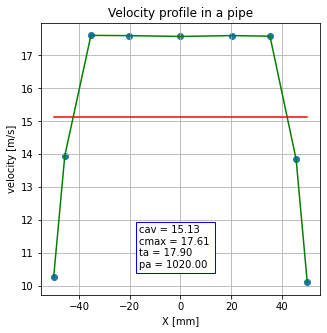

Średnia prędkość dla rurki_17.txt :  16.07  i średnie ciśnienie:  156.32


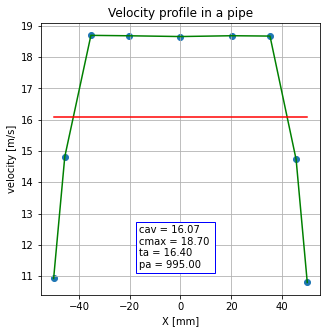

Średnia prędkość dla rurki_18.txt :  17.02  i średnie ciśnienie:  175.25


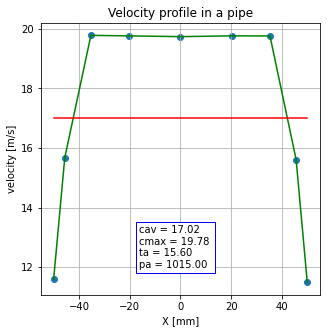

Średnia prędkość dla rurki_19.txt :  17.97  i średnie ciśnienie:  195.26


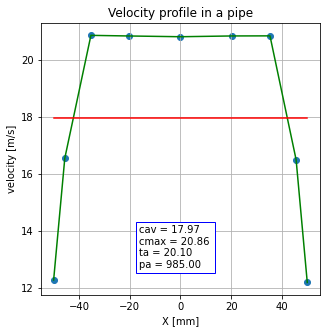

Średnia prędkość dla rurki_20.txt :  18.91  i średnie ciśnienie:  216.41


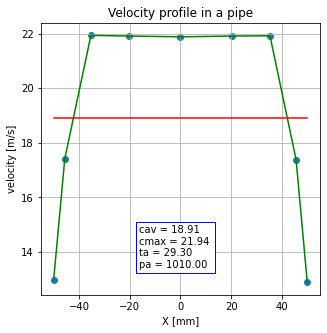

Średnia prędkość dla rurki_21.txt :  19.86  i średnie ciśnienie:  238.69


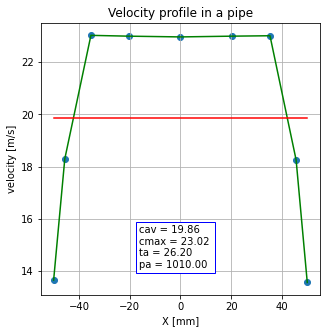

Średnia prędkość dla rurki_22.txt :  20.81  i średnie ciśnienie:  262.07


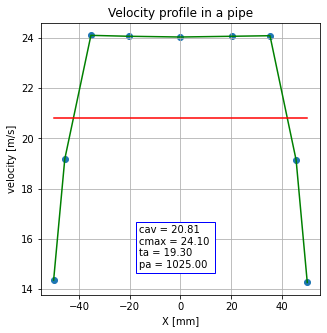

Średnia prędkość dla rurki_23.txt :  21.76  i średnie ciśnienie:  286.55


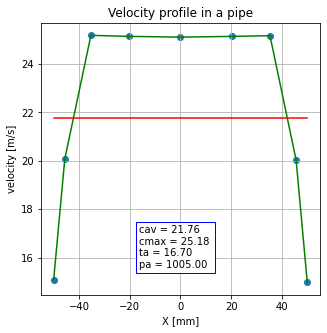

Średnia prędkość dla rurki_24.txt :  22.71  i średnie ciśnienie:  312.12


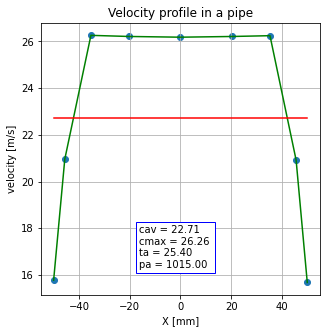

Średnia prędkość dla rurki_25.txt :  23.66  i średnie ciśnienie:  338.78


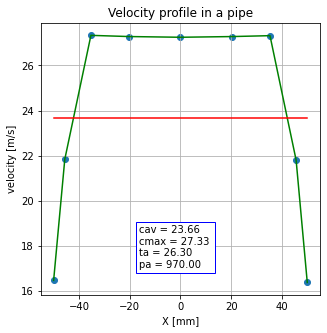

Średnia prędkość dla rurki_26.txt :  24.61  i średnie ciśnienie:  366.53


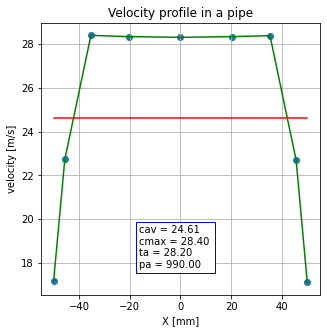

Średnia prędkość dla rurki_27.txt :  25.56  i średnie ciśnienie:  395.36


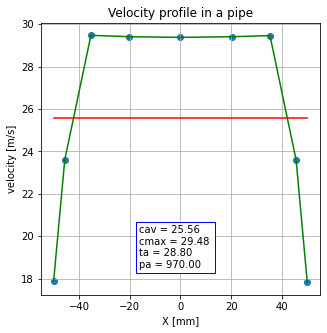

Średnia prędkość dla rurki_28.txt :  26.51  i średnie ciśnienie:  425.28


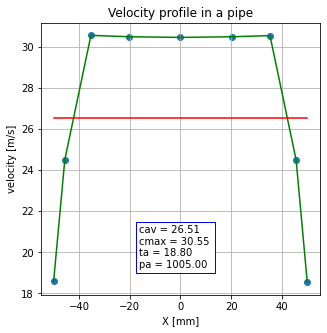

Średnia prędkość dla rurki_29.txt :  27.46  i średnie ciśnienie:  456.29


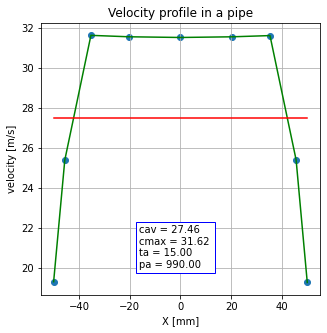

Średnia prędkość dla rurki_30.txt :  28.41  i średnie ciśnienie:  488.4


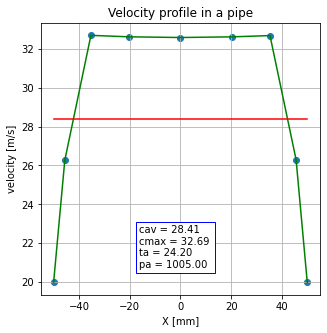

In [2]:
R = 0.05 * 1000
A = 3.14 * R * R
ro = 1.21
R_1 = 0.408 *R 
R_2 = 0.706 *R
R_3 = 0.912 *R 

files = ['rurki_01.txt', 'rurki_02.txt','rurki_03.txt', 'rurki_04.txt', 'rurki_05.txt', 'rurki_06.txt','rurki_07.txt', 'rurki_08.txt',
         'rurki_09.txt', 'rurki_10.txt','rurki_11.txt', 'rurki_12.txt', 'rurki_13.txt', 'rurki_14.txt','rurki_15.txt', 
         'rurki_16.txt', 'rurki_17.txt','rurki_18.txt', 'rurki_19.txt', 'rurki_20.txt', 'rurki_21.txt','rurki_22.txt', 'rurki_23.txt',
         'rurki_24.txt', 'rurki_25.txt','rurki_26.txt', 'rurki_27.txt', 'rurki_28.txt', 'rurki_29.txt','rurki_30.txt']

for file_name in files:
    data = []
    with open(file_name) as file:
        next(file)
        for line in file:
            row = line.split()
            data.append(row)
    df = pd.DataFrame(data=data)
    n=df[df[0].str.contains("ag", na=False)].index[1]
    m=df[df[0].str.contains("ad", na=False)].index[0] 
    k=m-n
    
    cisnienia = []
    for i in range(n,(m+1)):
        cisnienia.append(float(df[1][i]))

    sqrtpdn=[]
    cn=[]
    for j in range(k+1):
        sqrtpdn.append(math.sqrt(cisnienia[j]))
        cn.append(math.sqrt((2*cisnienia[j])/ro))
    pdsr=(sum(sqrtpdn)/(k+1))*(sum(sqrtpdn)/(k+1))
    csr=math.sqrt(2*pdsr/ro)

    v = A * csr
    ma = ro* csr* A
    print('Średnia prędkość dla', file_name,': ', round(csr,2), ' i średnie ciśnienie: ', round(pdsr,2))
    
    pa=random.randrange(970,1030,5) # generator cisnienia hPa
    ta=float(decimal.Decimal(random.randrange(150, 300))/10) # temperatura
    
    zakres=[-R, -R_3, -R_2, -R_1, 0, R_1, R_2, R_3, R]
    
    plt.figure(figsize=(5,5))
    plt.plot(zakres, cn, color='green')
    plt.plot([-50,50],[csr,csr], color='red')
    plt.xlabel('X [mm]')
    plt.ylabel('velocity [m/s]')
    plt.scatter(zakres, cn)
    plt.title('Velocity profile in a pipe')
    plt.annotate('cav = %5.2f \ncmax = %5.2f \nta = %5.2f \npa = %5.2f'%(csr, max(cn), ta, pa), xy=(0.35, 0.1), xycoords='axes fraction', bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="b",))
    plt.grid(True)
    plt.show()